## MNIST 데이터셋 + PCA 주성분분석 적용

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.utils import plot_model # 모델 플롯 그리기
from keras.utils import set_random_seed # 랜덤 시드 설정
from keras.models import save_model, load_model # 모델 저장 및 로드
from PIL import Image  # 이미지 처리

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f"train : {x_train.shape}, test: {x_test.shape}")

train : (60000, 28, 28), test: (10000, 28, 28)


In [4]:
x_train = x_train /255.0
x_test = x_test /255.0

In [5]:
x_train_flatten = x_train.reshape(-1, 28*28)
x_test_flatten = x_test.reshape(-1,28*28)

### PCA 분석

In [29]:
from sklearn.decomposition import PCA
c = np.arange(0.8, 1.0, 0.05)
a = []
for i in c:
    pca = PCA(n_components=i)
    pca.fit(x_train_flatten)
    a.append(len(pca.explained_variance_ratio_))  

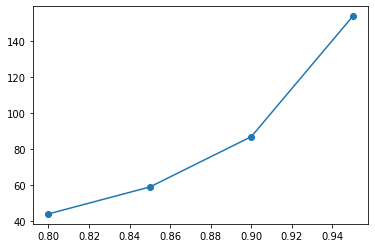

In [33]:
plt.plot([0.8,0.85,0.9,0.95], a, marker='o')
plt.show()

In [34]:
print(len(pca.explained_variance_ratio_))

154


In [21]:
print(pca.singular_values_)

[554.08236184 473.79289646 441.76832659 412.90967564 392.45954891
 369.34743738 321.72592959 302.04650943 295.59576934 273.06366032
 258.31039157 252.97700677 232.98056847 231.36547104 223.47337767
 216.59463867 204.70103539 200.98426661 193.8016728  190.95856472
 183.65236363 178.45839561 173.68452004 169.90685928 167.17214551
 162.9474728  160.33074547 157.72351701 153.49152274 147.83552759
 144.28725    143.19277799 138.07150073 136.22239172 134.28567117
 131.13991042 126.49333601 124.2313057  123.40999747 122.22992796
 120.20481924 118.62713309 115.06215042 112.23881111 110.35705642
 108.93302362 107.01475474 105.46372614 103.71956692 100.90840213
 100.45950025  99.47658474  96.76475599  95.60902108  94.8075482
  92.66540711  92.3380578   90.42557427  89.59931997  87.99801628
  87.22623816  87.0004999   85.37550857  83.71483558  82.22568067
  80.9665046   80.14523835  78.90007754  78.10823212  77.24889952
  76.90918966  75.68727777  74.94785429  74.38349456  72.41384403
  72.005470

In [35]:
x_train_flatten = pca.transform(x_train_flatten)

In [38]:
x_train_recover = pca.inverse_transform(x_train_flatten)

### PCA 전후 이미지 비교 (0.95일때와 0.6일때 비교)

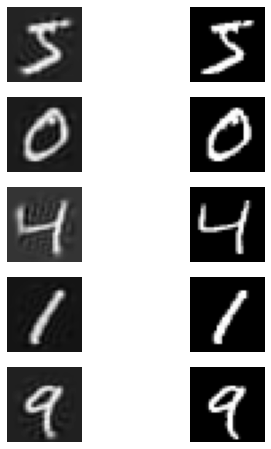

In [56]:
def makepic(n):
    plt.rcParams['figure.figsize'] = (6,8)
    fig, axs = plt.subplots(n,2)
    for i in range(1,n+1):
        plt.subplot(n,2,i*2-1)
        plt.imshow(x_train_recover.reshape(-1,28,28)[i-1], cmap='gray')
        plt.axis('off')
        plt.subplot(n,2,2*i)
        plt.imshow(x_train[i-1], cmap='gray')
        plt.axis('off')
    plt.show()
# 0.95일때와 원본 비교
makepic(5)

In [57]:
x_train_flatten = x_train.reshape(-1, 28*28)
pca = PCA(n_components=0.6)
pca.fit(x_train_flatten)

PCA(n_components=0.6)

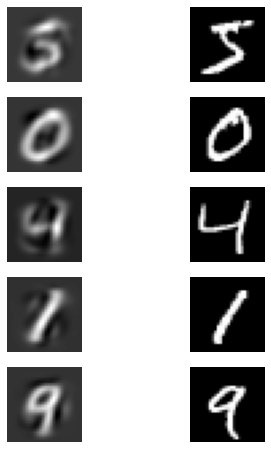

In [58]:
x_train_pca = pca.transform(x_train_flatten)
x_train_recover = pca.inverse_transform(x_train_pca)
# 0.6일때와 원본 비교
makepic(5)

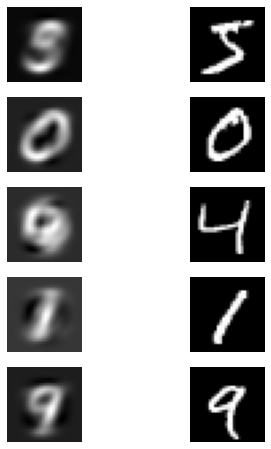

In [59]:
x_train_flatten = x_train.reshape(-1, 28*28)
pca = PCA(n_components=0.3)
pca.fit(x_train_flatten)
x_train_pca = pca.transform(x_train_flatten)
x_train_recover = pca.inverse_transform(x_train_pca)
# 0.3일때와 원본 비교
makepic(5)

### Random PCA 적용
- PCA에서 svd_solver 파라미터를 "randomized" 로 지정 -> Random PCA 적용
- 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾습니다. 
- 계산 복잡도 : O(m*d^2)+O(d^3) (SVD방식은 O(m*n^2)+O(n^3))
- svd_solver 파라미터의 default는 'auto'이고 m or n > 500 and d = m이나 n의 80%보다 작으면 자동으로 Random PCA 사용

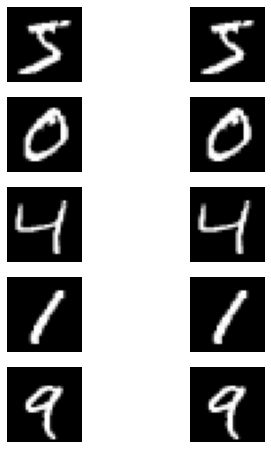

In [61]:
pca = PCA(svd_solver='randomized')
pca.fit(x_train_flatten)
x_train_pca = pca.transform(x_train_flatten)
x_train_recover = pca.inverse_transform(x_train_pca)
# 0.3일때와 원본 비교
makepic(5)

### Kernel PCA 적용
- KernelPCA 클래스 사용
- 차원 축소를 위한 복잡한 비선형 투영 수행

In [6]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.84)
pca.fit(x_train_flatten)
# 너무 오래 걸려서 포기

In [ ]:
x_train_pca = pca.transform(x_train_flatten)
x_train_recover = pca.inverse_transform(x_train_pca)
# 0.3일때와 원본 비교
makepic(5)